In [122]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import scipy as sp 
from math import pi
from math import sqrt
from math import exp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [155]:
#-------------------------------------------------------------------------------
#wczytywanie danych
#-------------------------------------------------------------------------------
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_classes = pd.DataFrame(iris.target)
iris_classes.columns = ['class']

#split 80/20
x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_classes,test_size=0.2)

M = np.array([1,2,5,10,20,50])

#convert na numpy, bo coś klasyfikator ma problem z dataframami i pluje warningami.
#nie wiem na ile są one istotne, ale wolę dmuchać na zimne. Wygląda na to że conversja nie zmienia działania reszty
x_Pu = x_train.to_numpy()
y_Pu = y_train.to_numpy().ravel()
x_Pt = x_test.to_numpy()
y_Pt = y_test.to_numpy().ravel()


In [156]:
#-------------------------------------------------------------------------------
#Bagging
#-------------------------------------------------------------------------------
tree_clf = DecisionTreeClassifier()
lda_clf = LinearDiscriminantAnalysis()

tree_false = np.zeros(M.size)
lda_false = np.zeros(M.size)

for i in range(0,M.size):
    
    tree_bagging = BaggingClassifier(base_estimator = tree_clf, n_estimators = M[i])
    tree_bagging.fit(x_Pu,y_Pu)    
    tree_confMatrix = confusion_matrix(y_Pt,tree_bagging.predict(x_Pt))
    tree_false[i] = tree_confMatrix.sum() - (tree_confMatrix[0][0] + tree_confMatrix[1][1] + tree_confMatrix[2][2])
    
    lda_bagging = BaggingClassifier(base_estimator = lda_clf, n_estimators = M[i])
    lda_bagging.fit(x_Pu,y_Pu)    
    lda_confMatrix = confusion_matrix(y_Pt,lda_bagging.predict(x_Pt))
    lda_false[i] = lda_confMatrix.sum() - (lda_confMatrix[0][0] + lda_confMatrix[1][1] + lda_confMatrix[2][2]) 

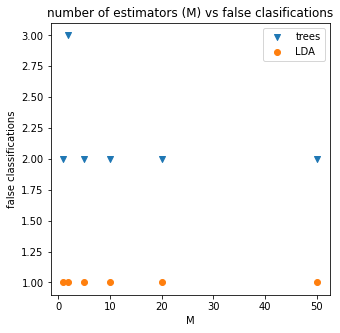

In [157]:
#-------------------------------------------------------------------------------
#wizualka
#-------------------------------------------------------------------------------
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1,1,1 ) 
ax1.scatter(M, tree_false, marker="v", label='trees', c='#1f77b4')
ax1.scatter(M, lda_false, label='LDA', c='#ff7f0e')
ax1.title.set_text("number of estimators (M) vs false clasifications")
ax1.set_xlabel("M")
ax1.set_ylabel("false classifications")
ax1.legend()
plt.show()